In [13]:
library (RCurl)
library(ggplot2)
library(repr)

In [1]:
# url='https://raw.githubusercontent.com/Percona-Lab-results/PXC-8-March2020/master/res-tpcc-'+cluster+'-'+nodes+'nodes-1writer-1/res_thr'+threads+'.txt'

loadd  <- function (cluster,nodes) {
    threads <- c(1,2,4,8,16,64,128,256)
    res = data.frame()
    for (val in threads) {
        urldown=paste0("https://raw.githubusercontent.com/Percona-Lab-results/PXC-8-March2020/master/res-tpcc-",cluster,"-",nodes,"nodes-1writer-1","/res_thr",val,".txt")
        download <- getURL(urldown)
        
        dl<-strsplit(download, split='\n')
        data <- read.csv (text = grep("^[0-9]", dl[[1]], value = TRUE), header=F)
        
        data$threads=val
        data$nodes=nodes
        data$cluster=cluster
        if(nrow(res)<1){
            res<-data
        }else{
            res<-rbind(data,res)
        }
    }
    
    return(res)
}



In [7]:
results <- loadd("GR8","3")
results <- rbind(results,loadd("GR8","5"))
results <- rbind(results,loadd("PXC8","3"))
results <- rbind(results,loadd("PXC8","5"))
#results <- rbind(results,loadd("res-tpcc-no-GR-mysql-8.0.18-1",16,server = "MySQL .18"))

In [60]:
theme_set(theme_light())
theme_replace(axis.text.x=element_text(size = rel(2)))
theme_replace(axis.text.y=element_text(size = rel(2)))
theme_replace(axis.title.x=element_text(size = rel(1.5)))
theme_replace(axis.title.y=element_text(size = rel(1.5), angle = 90))
theme_replace(legend.title=element_text(size = rel(1.5)))
theme_replace(legend.text=element_text(size = rel(1.5)))
theme_replace(plot.title=element_text(size = rel(2)))


Percona XtraDB Cluster 3 nodes

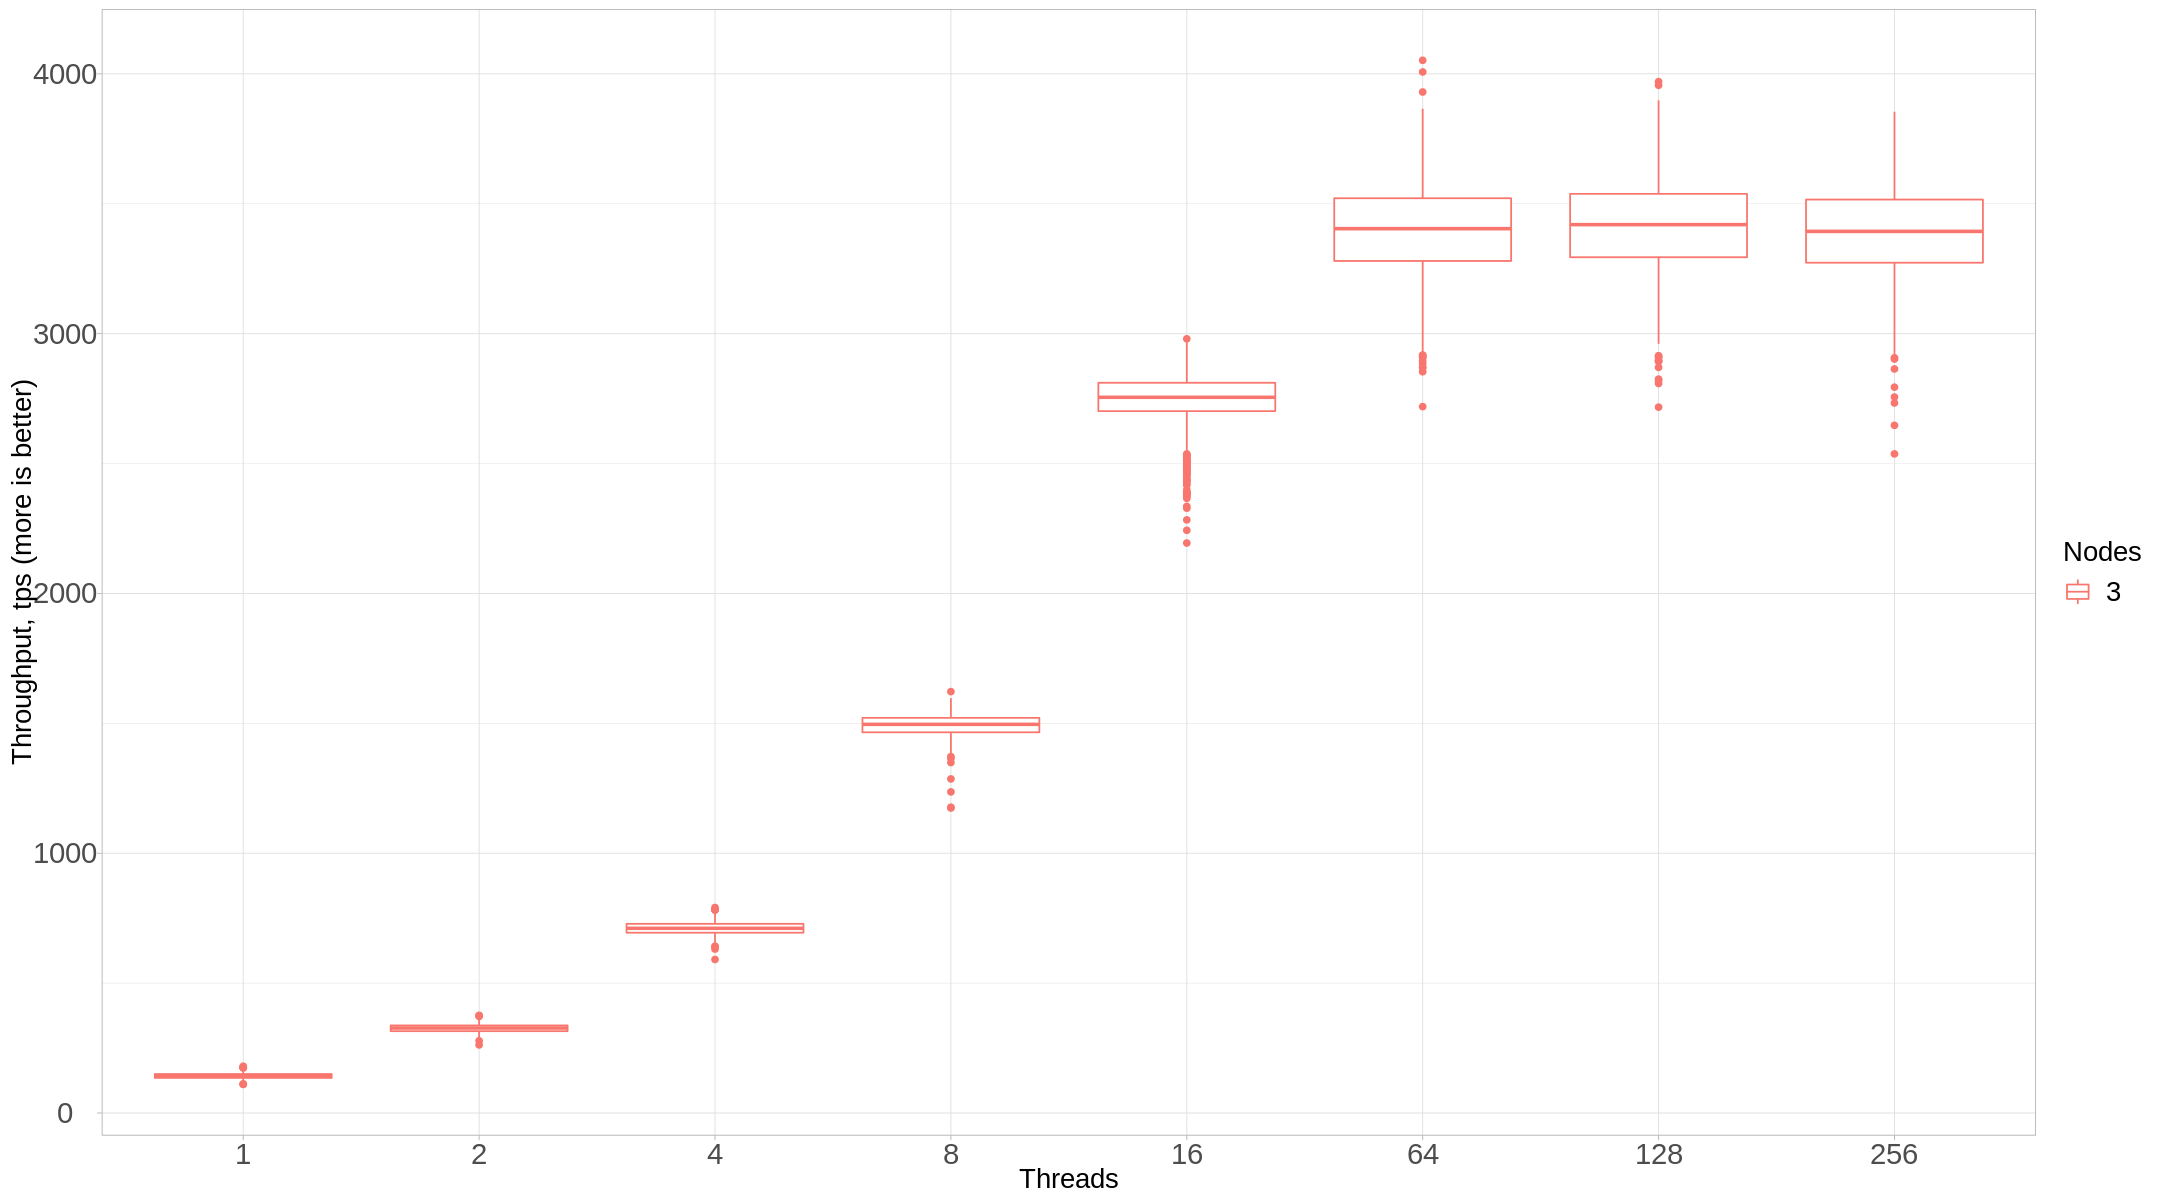

In [39]:
m <- ggplot(data = subset(results,cluster=="PXC8" & V1>900 & nodes==3), 
            aes(x=as.factor(threads), y=V3, color=as.factor(nodes)))

options(repr.plot.width=18, repr.plot.height=10)


m + geom_boxplot()+
    ylab("Throughput, tps (more is better)")+
    xlab("Threads")+
    scale_colour_discrete(name="Nodes")

Percona XtraDB Cluster 3 nodes - Individual scales

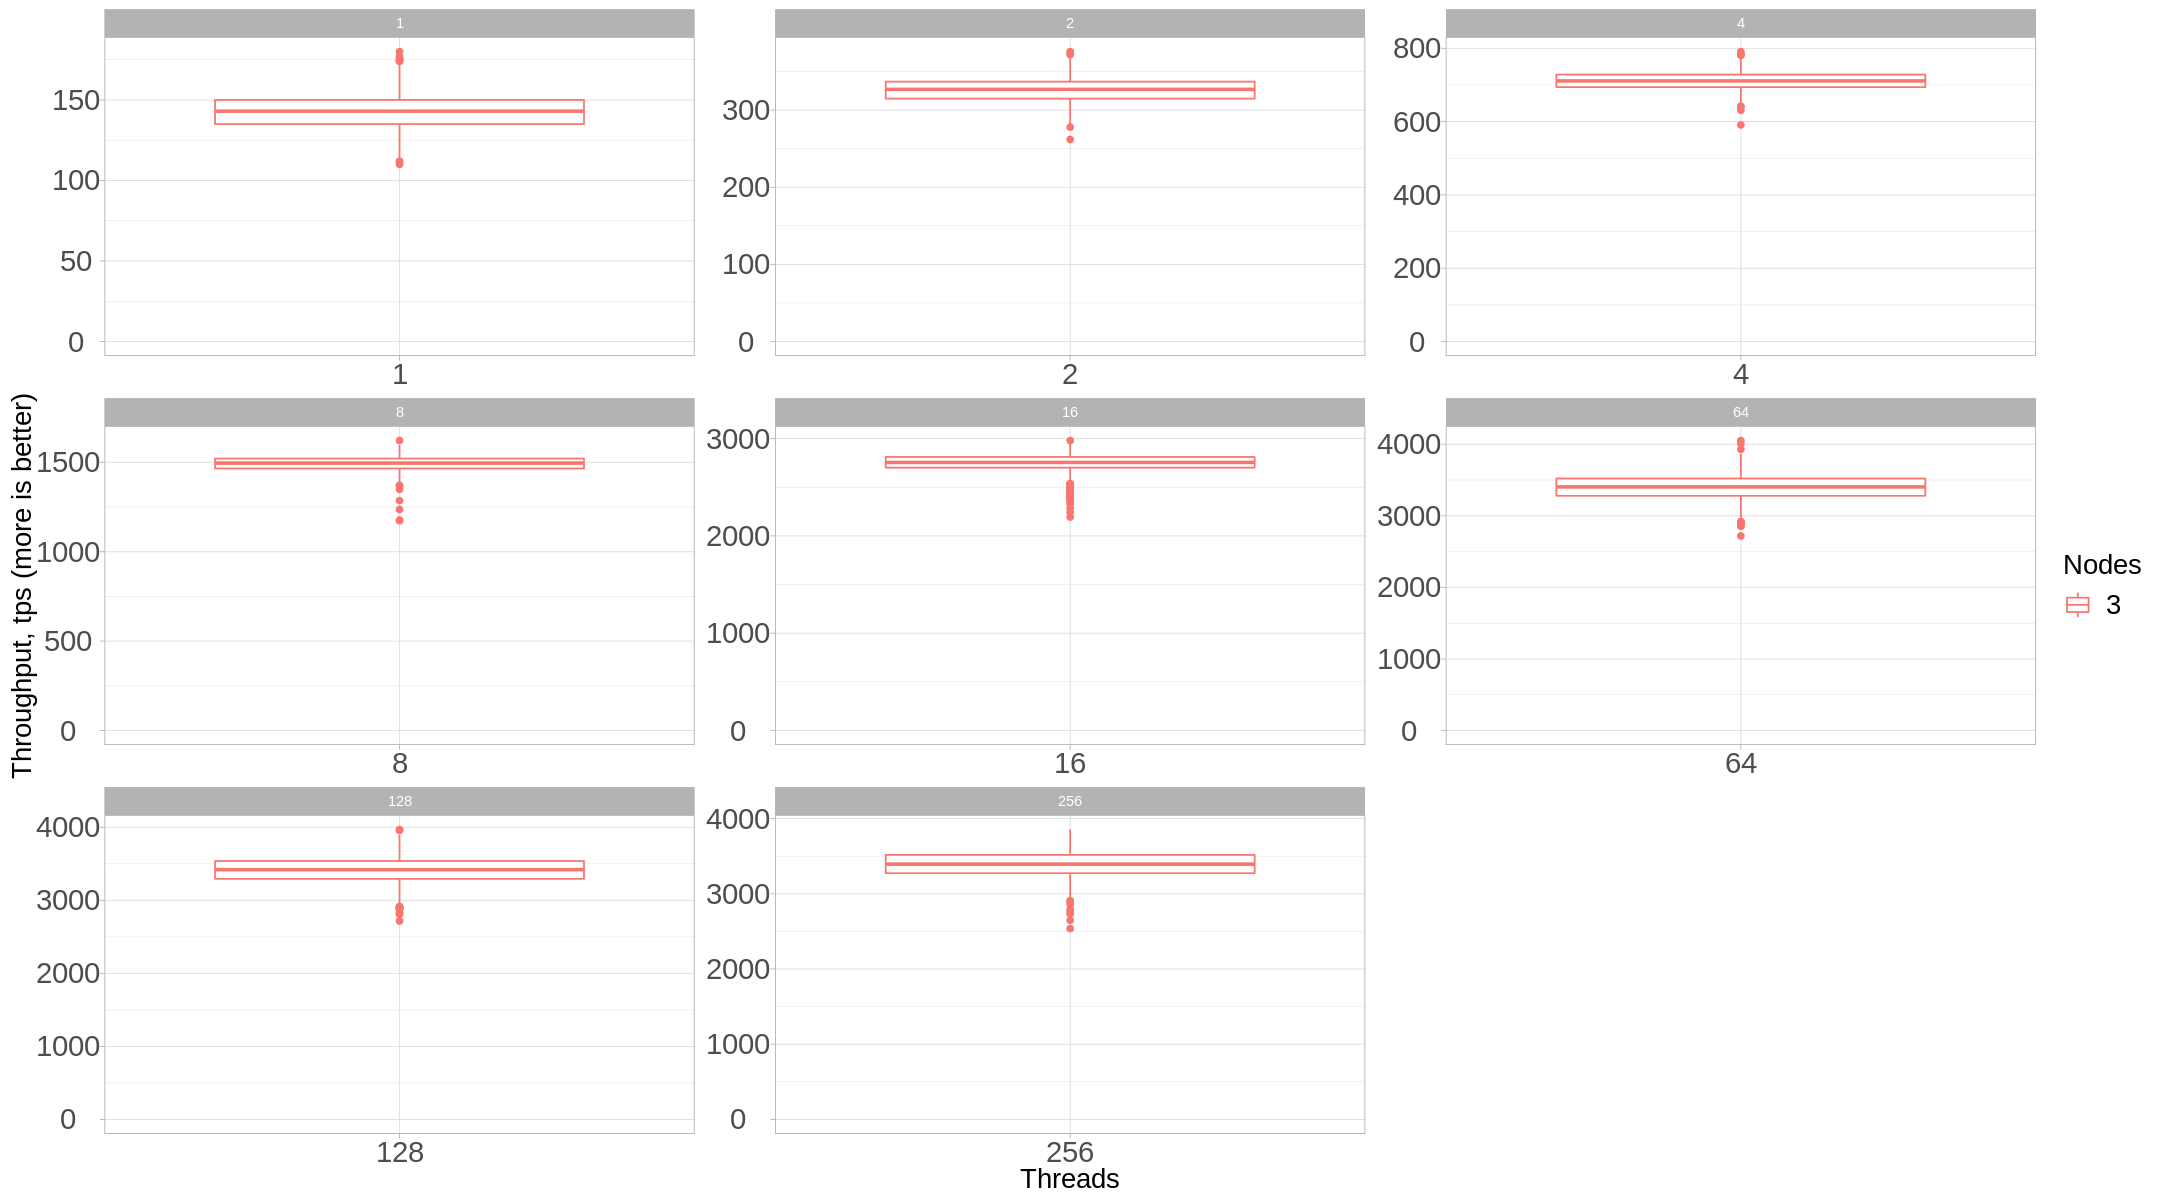

In [45]:
m <- ggplot(data = subset(results,cluster=="PXC8" & V1>900 & nodes==3), 
            aes(x=as.factor(threads), y=V3, color=as.factor(nodes)))

options(repr.plot.width=18, repr.plot.height=10)


m + geom_boxplot()+
    ylab("Throughput, tps (more is better)")+
    xlab("Threads")+
    scale_colour_discrete(name="Nodes")+facet_wrap( ~ threads,scales="free")+expand_limits(y=0)

Percona XtraDB Cluster 3 nodes, timeline for 64 threads

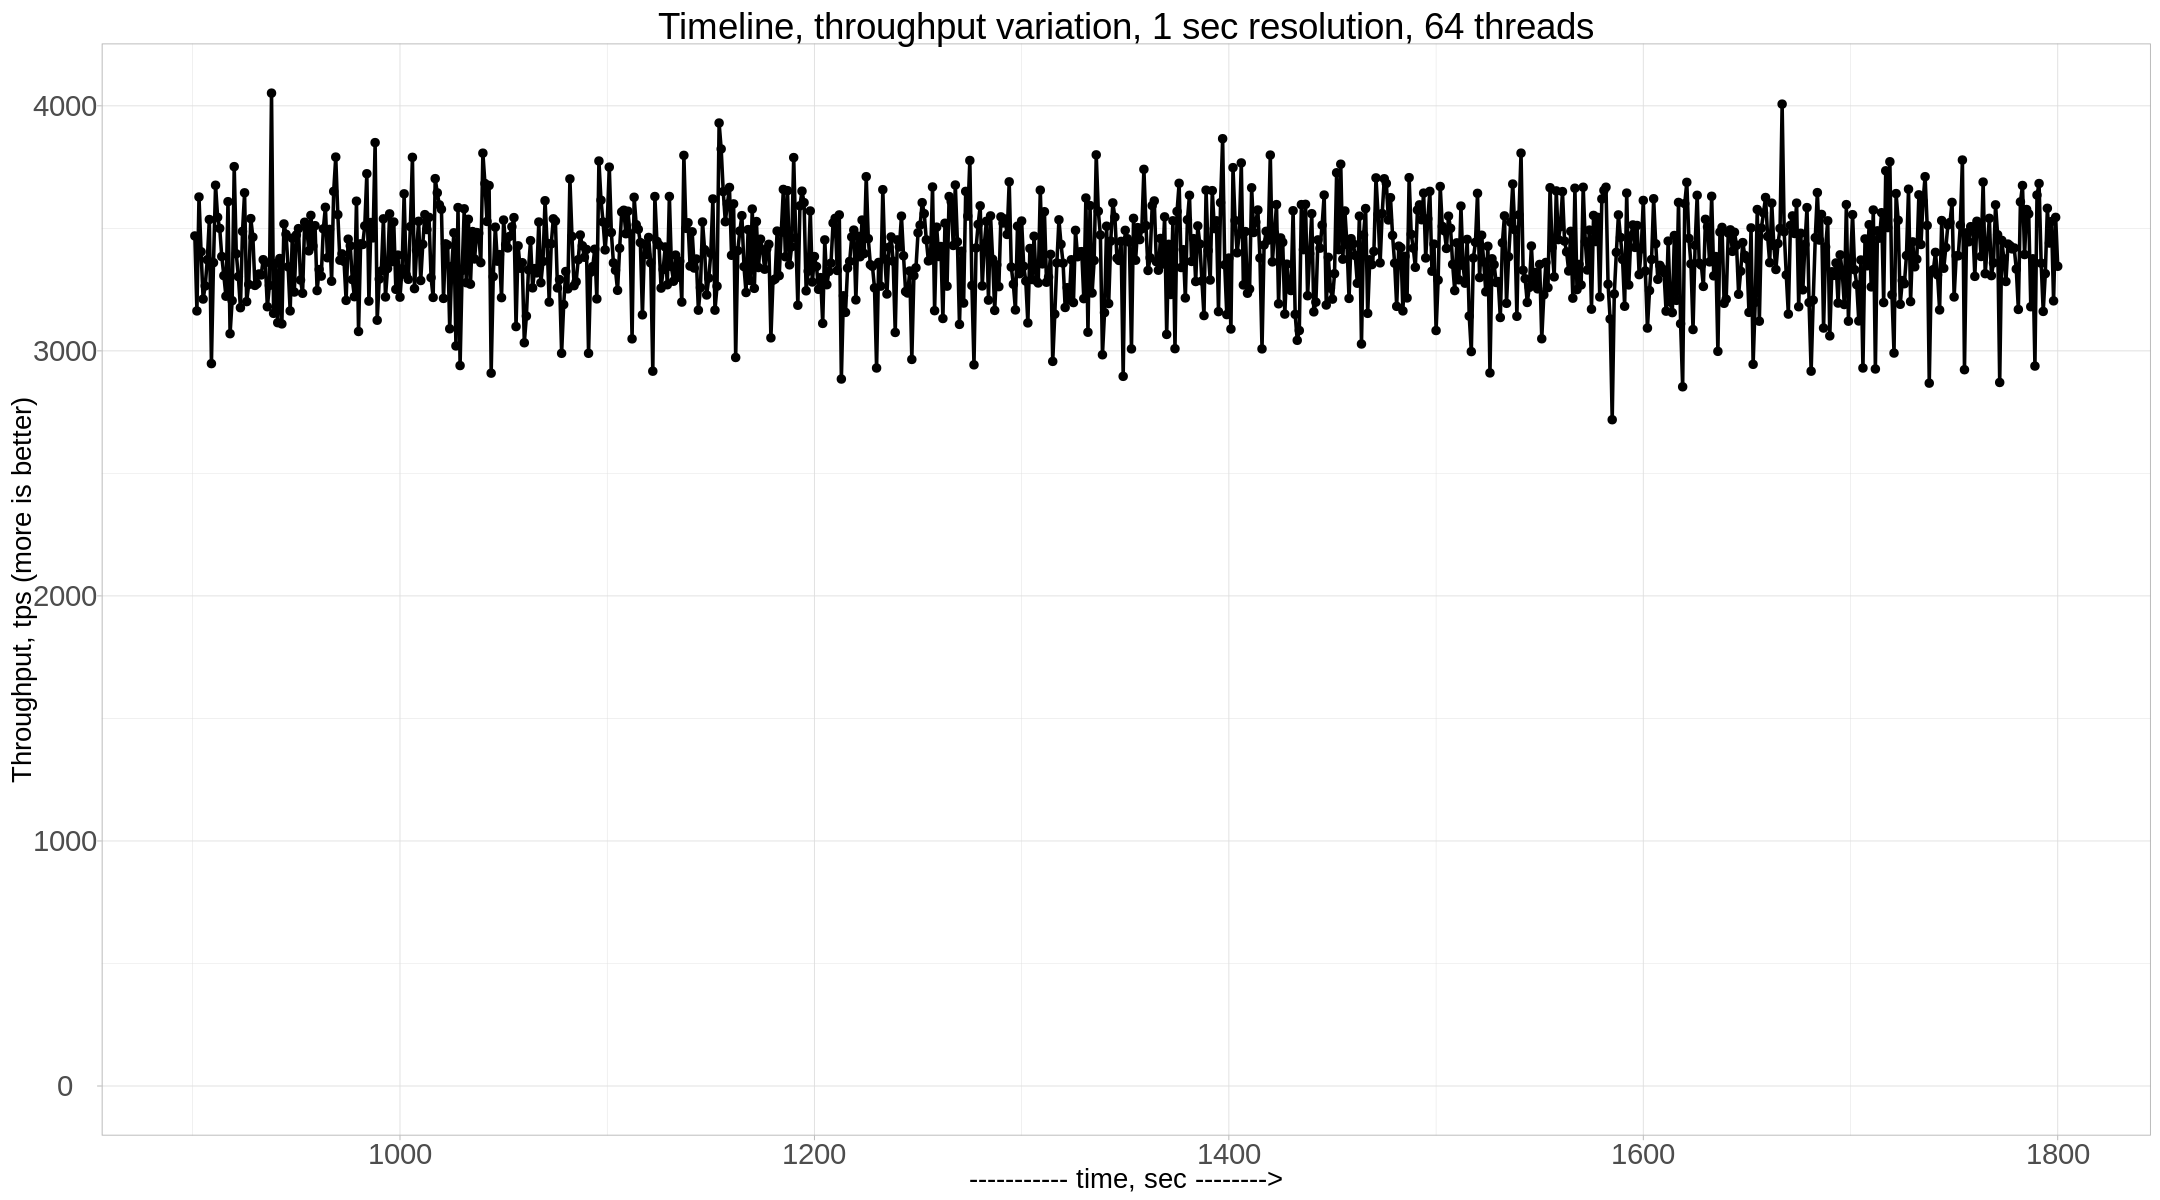

In [58]:
m <- ggplot(data = subset(results,cluster=="PXC8" & V1>900 & nodes==3 & threads==64), 
            aes(x=V1, y=V3))

options(repr.plot.width=18, repr.plot.height=10)


m + geom_line(size=1)+geom_point(size=2)+
    ylab("Throughput, tps (more is better)")+
    xlab("----------- time, sec -------->")+
    labs(title="Timeline, throughput variation, 1 sec resolution, 64 threads")+    
    expand_limits(y=0)

Percona XtraDB Cluster 3 nodes vs 5 nodes

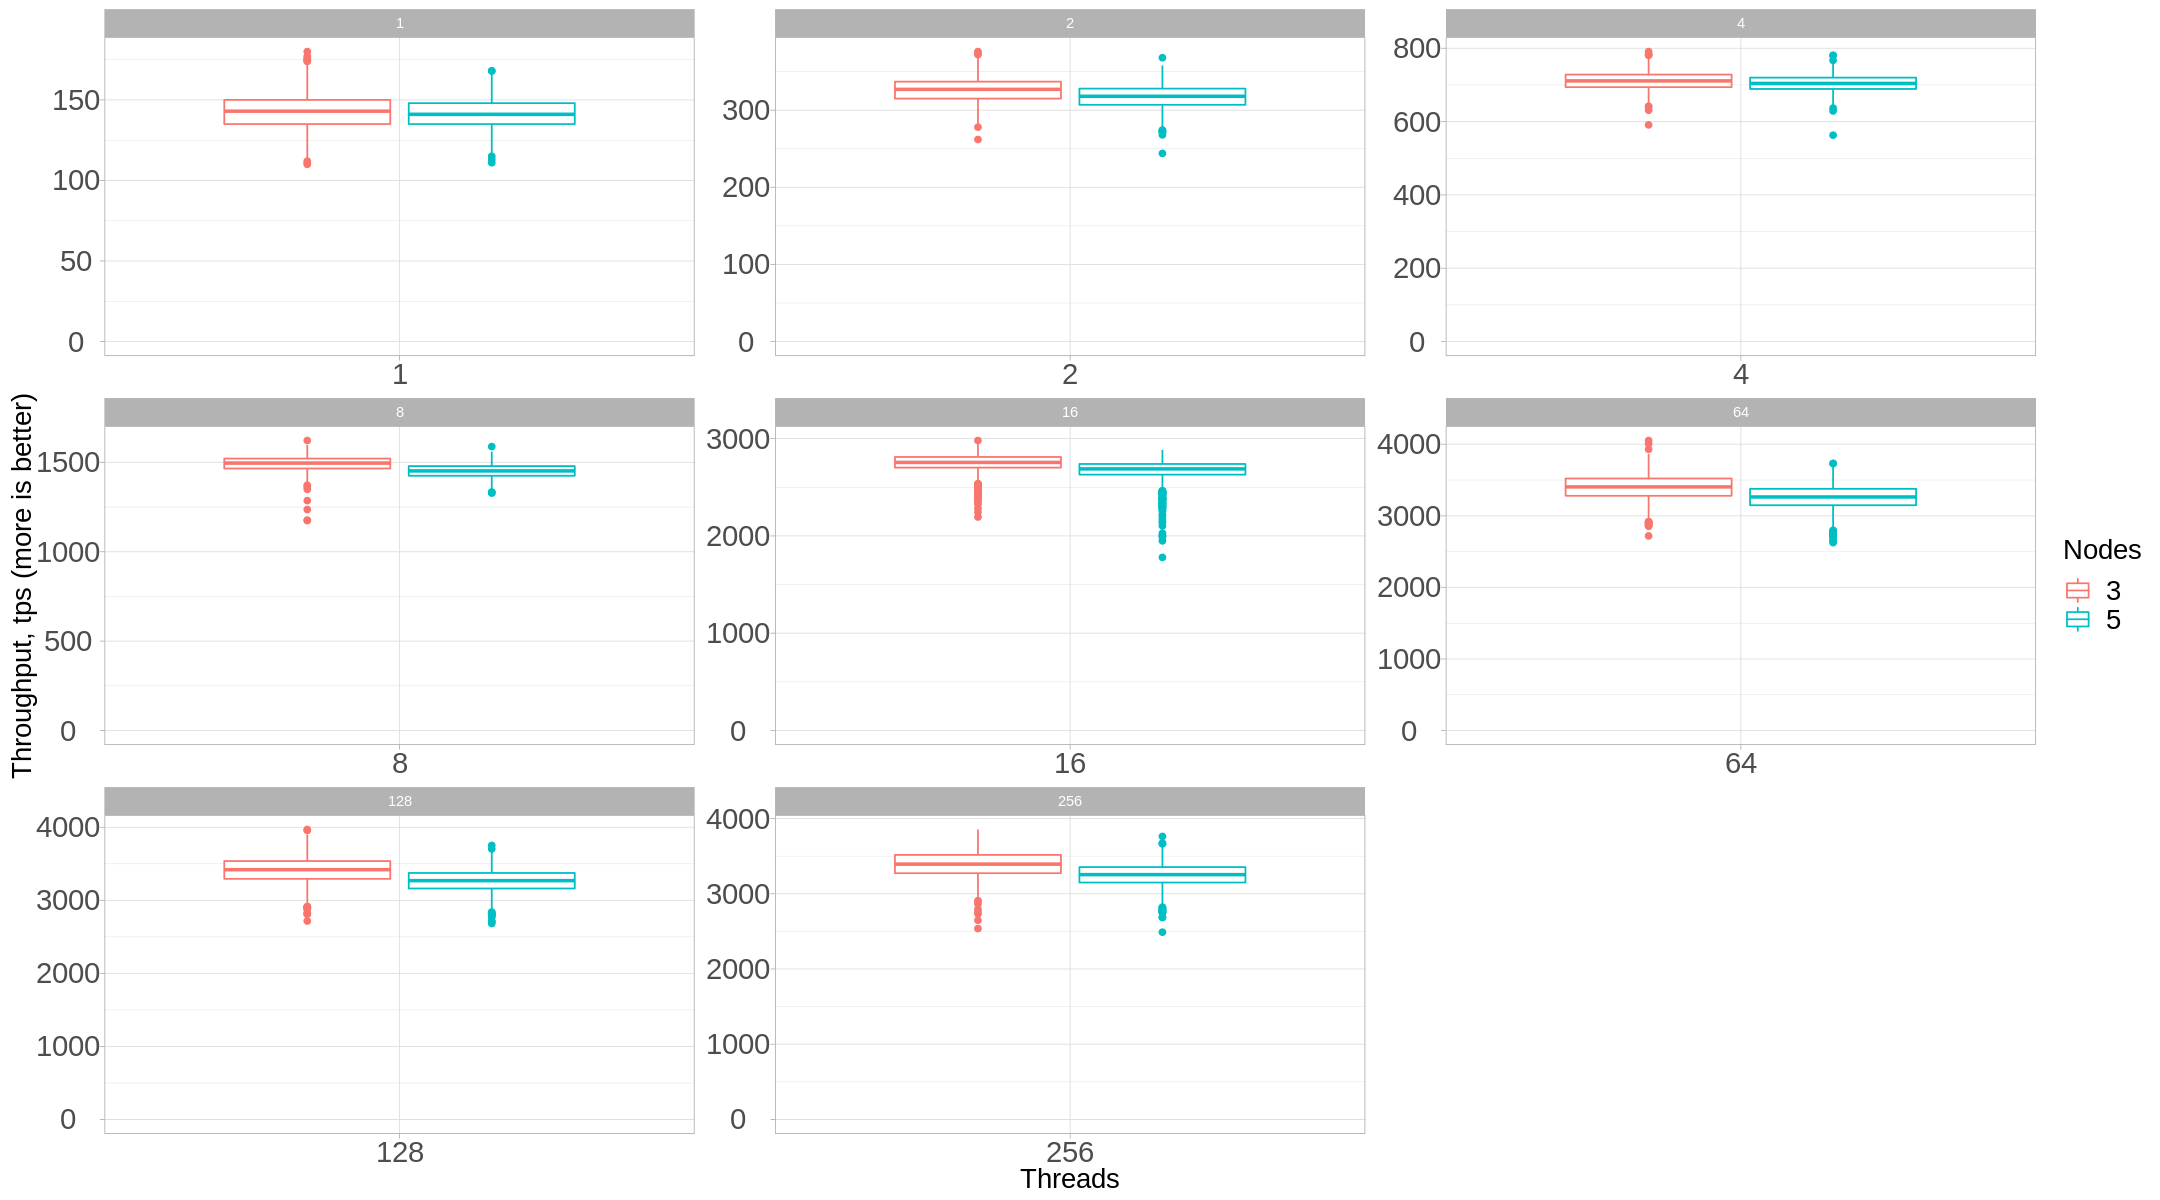

In [61]:
m <- ggplot(data = subset(results,cluster=="PXC8" & V1>900), 
            aes(x=as.factor(threads), y=V3, color=as.factor(nodes)))

options(repr.plot.width=18, repr.plot.height=10)


m + geom_boxplot()+
    ylab("Throughput, tps (more is better)")+
    xlab("Threads")+
    scale_colour_discrete(name="Nodes")+facet_wrap( ~ threads,scales="free")+expand_limits(y=0)


*Percona XtraDB Cluster 3 nodes, timeline for 64 threads*

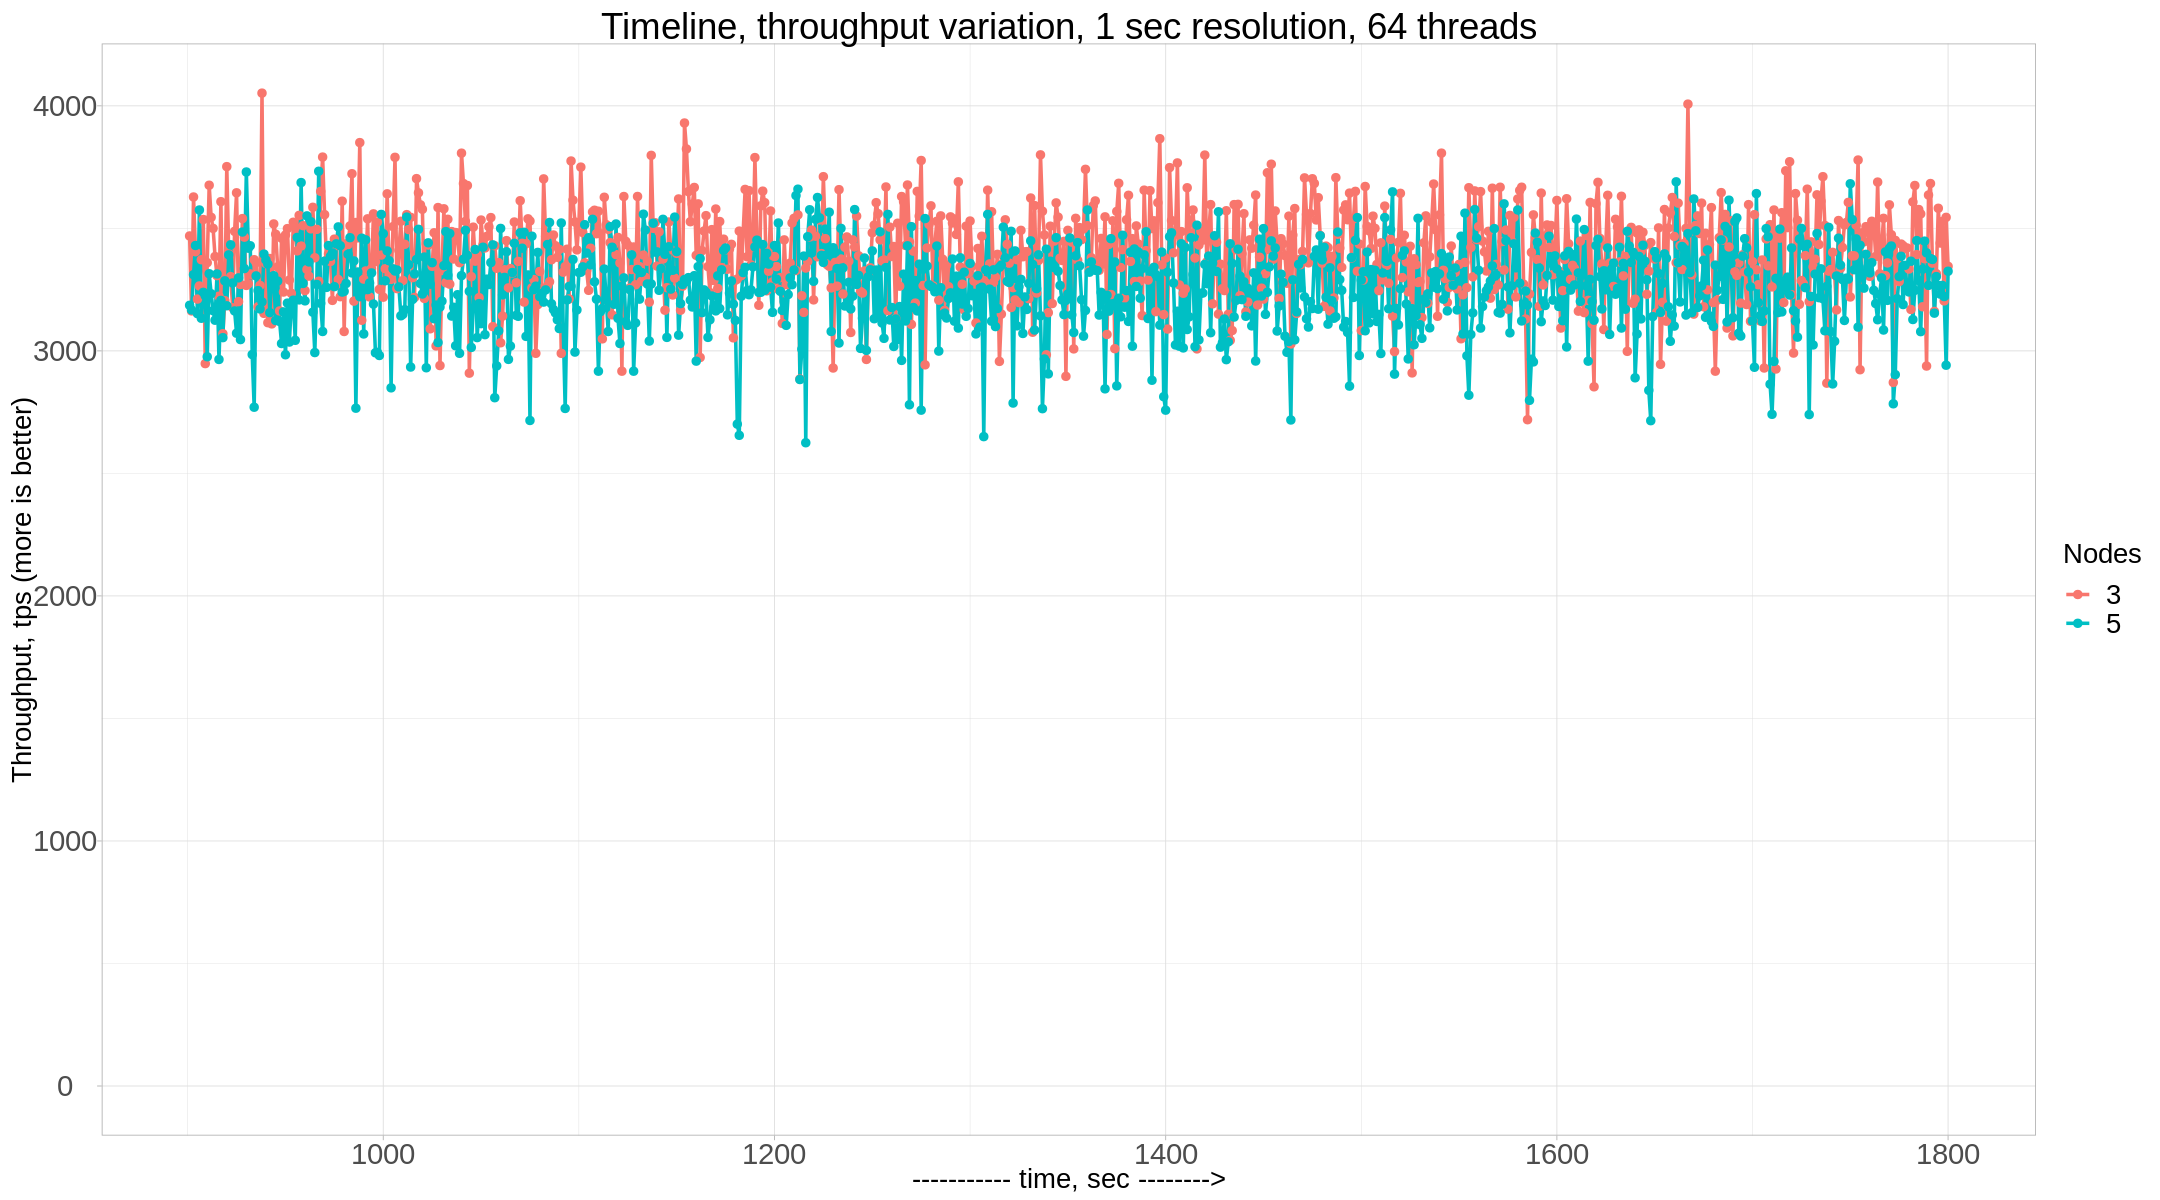

In [63]:
m <- ggplot(data = subset(results,cluster=="PXC8" & V1>900 & threads==64), 
            aes(x=V1, y=V3,color=as.factor(nodes)))

options(repr.plot.width=18, repr.plot.height=10)


m + geom_line(size=1)+geom_point(size=2)+
    ylab("Throughput, tps (more is better)")+
    xlab("----------- time, sec -------->")+
    labs(title="Timeline, throughput variation, 1 sec resolution, 64 threads")+    
    expand_limits(y=0)+
    scale_colour_discrete(name="Nodes")

Percona XtraDB Cluster 3 nodes vs Group Replication 3 nodes

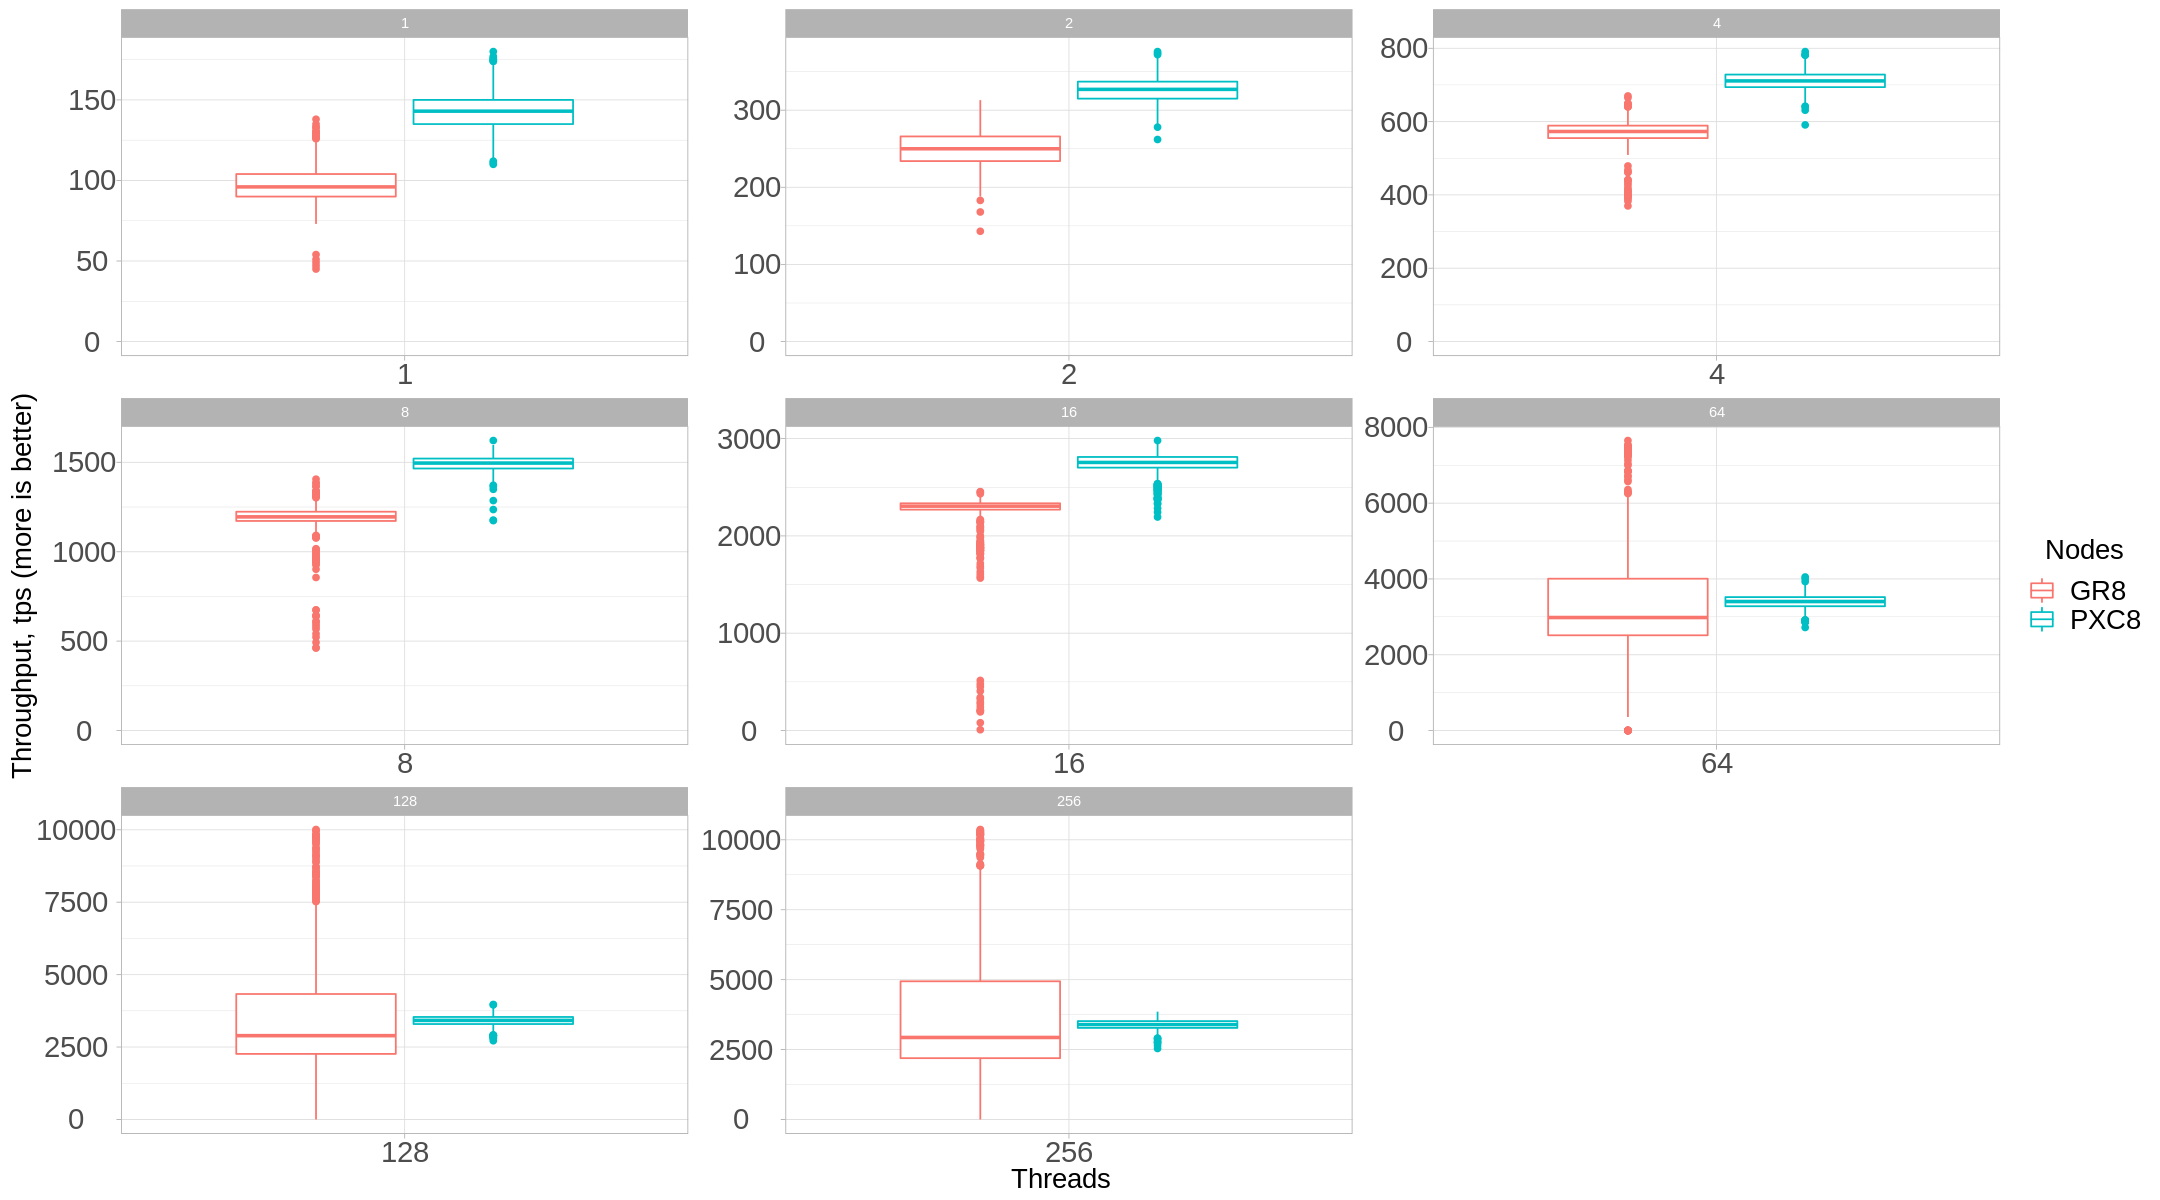

In [64]:
m <- ggplot(data = subset(results,nodes=="3" & V1>900), 
            aes(x=as.factor(threads), y=V3, color=as.factor(cluster)))

options(repr.plot.width=18, repr.plot.height=10)


m + geom_boxplot()+
    ylab("Throughput, tps (more is better)")+
    xlab("Threads")+
    scale_colour_discrete(name="Nodes")+facet_wrap( ~ threads,scales="free")+expand_limits(y=0)